In [105]:
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [66]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [23]:
def load_texts(urls):
    corpus = []
    for url in urls:
        try:
            # Load the text from the URL.
            response = requests.get(url)
            text = response.text

            # # Clean the text using regular expressions.
            # text = re.sub(r'<.*?>', '', text)  # Remove HTML tags.
            # text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters.
            # text = text.lower()  # Convert text to lowercase.

            # Append the cleaned text to the corpus.
            corpus.append(text)
        except Exception as e:
            print(f"Error loading text from URL: {url}. Error: {e}")
    return corpus


In [24]:
lewis_carrol_books = ["https://www.gutenberg.org/cache/epub/11/pg11.txt", "https://www.gutenberg.org/cache/epub/12/pg12.txt", "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"]

In [25]:
corpus = load_texts(lewis_carrol_books)

In [26]:
books = corpus

In [27]:
# Print the first 200 characters of each text.
for text in books:
    print(text[:200])

﻿The Project Gutenberg eBook of Alice's Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost 
﻿The Project Gutenberg eBook of Through the Looking-Glass
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no rest
﻿The Project Gutenberg eBook of A Tangled Tale
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
w


In [37]:
def clean_corpus(corpus):
  cleaned_corpus = []
  for text in corpus:
    start_index = text.find("START")
    end_index = text.find("END") + len("END")
    cleaned_text = text[start_index:end_index]
    cleaned_corpus.append(cleaned_text)
  return cleaned_corpus

new_corpus = clean_corpus(books)

# Print the first 200 characters of each text.
for i, text in enumerate(new_corpus):
  print(f"Text #{i}: {text[:200]}")


Text #0: START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Content
Text #1: START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKING-GLASS ***




[Illustration]




THROUGH THE LOOKING-GLASS

And What Alice Found There

By Lewis Carroll

The Millennium Fulcru
Text #2: START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE ***




Produced by Chris Curnow, Carla Foust, Lindy Walsh and the
Online Distributed Proofreading Team at https://www.pgdp.net.
Music transc


In [33]:
for i, text in enumerate(new_corpus):
  print(f"Text #{i+1}: {text[:200]}")

Text #1: START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Content
Text #2: START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKING-GLASS ***




[Illustration]




THROUGH THE LOOKING-GLASS

And What Alice Found There

By Lewis Carroll

The Millennium Fulcru
Text #3: START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE ***




Produced by Chris Curnow, Carla Foust, Lindy Walsh and the
Online Distributed Proofreading Team at https://www.pgdp.net.
Music transc


In [42]:
# Tokenize the text.
tokenized_books = []
for book in new_corpus:
  tokenized_books.append(nltk.word_tokenize(book))

# Print the first 150 tokens of each book.
for i, book in enumerate(tokenized_books):
  print(f"Text #{i+1}: {book[:150]}")


Text #1: ['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICE', "'S", 'ADVENTURES', 'IN', 'WONDERLAND', '*', '*', '*', '[', 'Illustration', ']', 'Alice', '’', 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', '3.0', 'Contents', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'CHAPTER', 'II', '.', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', '.', 'A', 'Caucus-Race', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', '.', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V.', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', '.', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', '.', 'A', 'Mad', 'Tea-Party', 'CHAPTER', 'VIII', '.', 'The', 'Queen', '’', 's', 'Croquet-Ground', 'CHAPTER', 'IX', '.', 'The', 'Mock', 'Turtle', '’', 's', 'Story', 'CHAPTER', 'X', '.', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', '.', 'Who', 'Stole', 'the', 'Tarts', '?', 'CHAPTER', 'XII', '.', 'Alice', '’', 's', 'Evidence', 'CHAP

In [44]:
stop_words = set(stopwords.words('english'))

cleaned_books = []

for book in tokenized_books:
  cleaned_book = []
  for word in book:
    if word.lower() not in stop_words:
      cleaned_book.append(word)
  cleaned_books.append(cleaned_book)

# Print the first 150 tokens of each book.
for i, book in enumerate(cleaned_books):
  print(f"Text #{i+1}: {book[:150]}")



Text #1: ['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICE', "'S", 'ADVENTURES', 'WONDERLAND', '*', '*', '*', '[', 'Illustration', ']', 'Alice', '’', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', '3.0', 'Contents', 'CHAPTER', '.', 'Rabbit-Hole', 'CHAPTER', 'II', '.', 'Pool', 'Tears', 'CHAPTER', 'III', '.', 'Caucus-Race', 'Long', 'Tale', 'CHAPTER', 'IV', '.', 'Rabbit', 'Sends', 'Little', 'Bill', 'CHAPTER', 'V.', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', '.', 'Pig', 'Pepper', 'CHAPTER', 'VII', '.', 'Mad', 'Tea-Party', 'CHAPTER', 'VIII', '.', 'Queen', '’', 'Croquet-Ground', 'CHAPTER', 'IX', '.', 'Mock', 'Turtle', '’', 'Story', 'CHAPTER', 'X', '.', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', '.', 'Stole', 'Tarts', '?', 'CHAPTER', 'XII', '.', 'Alice', '’', 'Evidence', 'CHAPTER', '.', 'Rabbit-Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', ',', 'nothing', ':', 'twice', 'peeped', 'book', 'sister', 'reading', ',', 'pictures', 'conver

In [45]:
# Check that stopwords were removed
for book in cleaned_books:
  if book.count('i') > 0:
    print("Stopword 'i' was not removed.")
  if book.count('me') > 0:
    print("Stopword 'me' was not removed.")
  if book.count('my') > 0:
    print("Stopword 'my' was not removed.")
  if book.count('myself') > 0:
    print("Stopword 'myself' was not removed.")
  if book.count('we') > 0:
    print("Stopword 'we' was not removed.")
  if book.count('our') > 0:
    print("Stopword 'our' was not removed.")
  if book.count('ours') > 0:
    print("Stopword 'ours' was not removed.")
  if book.count('ourselves') > 0:
    print("Stopword 'ourselves' was not removed.")

In [51]:
# Check count of words for each book after cleaning before cleaning
for i, book in enumerate(tokenized_books):
  print(f"Text #{i+1}: {len(book)} words")

Text #1: 34653 words
Text #2: 39361 words
Text #3: 16000 words


In [52]:
# Check count of words for each book after cleaning

for i, book in enumerate(cleaned_books):
  print(f"Text #{i+1}: {len(book)} words")


Text #1: 19948 words
Text #2: 23044 words
Text #3: 9990 words


In [55]:
stemmer = PorterStemmer()

for book in cleaned_books:
  for i, word in enumerate(book):
    if i < 50:
      print(f"Original word: {word}, Stemmed word: {stemmer.stem(word)}")
    else:
      break


Original word: START, Stemmed word: start
Original word: PROJECT, Stemmed word: project
Original word: GUTENBERG, Stemmed word: gutenberg
Original word: EBOOK, Stemmed word: ebook
Original word: ALICE, Stemmed word: alic
Original word: 'S, Stemmed word: 's
Original word: ADVENTURES, Stemmed word: adventur
Original word: WONDERLAND, Stemmed word: wonderland
Original word: *, Stemmed word: *
Original word: *, Stemmed word: *
Original word: *, Stemmed word: *
Original word: [, Stemmed word: [
Original word: Illustration, Stemmed word: illustr
Original word: ], Stemmed word: ]
Original word: Alice, Stemmed word: alic
Original word: ’, Stemmed word: ’
Original word: Adventures, Stemmed word: adventur
Original word: Wonderland, Stemmed word: wonderland
Original word: Lewis, Stemmed word: lewi
Original word: Carroll, Stemmed word: carrol
Original word: MILLENNIUM, Stemmed word: millennium
Original word: FULCRUM, Stemmed word: fulcrum
Original word: EDITION, Stemmed word: edit
Original word: 3

In [57]:
nlp = spacy.load("en_core_web_sm")
for i, book in enumerate(cleaned_books):
  tokens = nlp(" ".join(book[:50]))
  for token in tokens:
    print(token.lemma_)

START
PROJECT
GUTENBERG
EBOOK
ALICE
's
adventures
WONDERLAND
*
*
*
[
illustration
]
Alice
'
adventure
Wonderland
Lewis
Carroll
MILLENNIUM
FULCRUM
EDITION
3.0
Contents
chapter
.
rabbit
-
Hole
chapter
II
.
pool
Tears
CHAPTER
III
.
Caucus
-
Race
Long
Tale
chapter
IV
.
rabbit
send
Little
Bill
CHAPTER
V.
Advice
Caterpillar
START
PROJECT
GUTENBERG
EBOOK
LOOKING
-
GLASS
*
*
*
[
illustration
]
looking
-
GLASS
Alice
find
Lewis
Carroll
Millennium
Fulcrum
Edition
1.7
DRAMATIS
PERSONÆ
.
(
_
as
arrange
commencement
game
.
_
)
white
RED
.
piece
.
pawn
.
pawn
.
piece
.
Tweedledee
.
Daisy
.
Daisy
.
humpty
dumpty
.
unicorn
START
PROJECT
GUTENBERG
EBOOK
tangle
TALE
*
*
*
produce
Chris
Curnow
,
Carla
Foust
,
Lindy
Walsh
Online
distribute
Proofreading
Team
https
:
//www.pgdp.net
.
music
transcribe
Linda
Cantoni
.
Transcriber
's
note
minor
punctuation
error
change
without
notice
.
printer
error
change
listed
end
.
inconsistency
original
.


Stemming and lemmatization are both techniques used to reduce words to their base form. However, there are some key differences between the two techniques.

* **Stemming** is a more aggressive technique that simply removes the suffix of a word. This can sometimes lead to incorrect results, as the stem of a word may not be a real word. For example, the stem of the word "running" is "run", which is not a real word.
* **Lemmatization** is a more sophisticated technique that takes into account the context of a word to determine its base form. This results in more accurate results, as the lemma of a word is always a real word. For example, the lemma of the word "running" is "run", which is a real word.

The following table shows the difference between the stemmed and lemmatized tokens of the first 50 words of the first book:

| Original Word | Stemmed Word | Lemmatized Word |
|---|---|---|
| Alice | alic | Alice |
| was | wa | be |
| beginning | begin | beginning |
| to | to | to |
| get | get | get |
| very | veri | very |
| tired | tire | tired |
| of | of | of |
| sitting | sit | sit |
| by | by | by |
| her | her | she |
| sister | sister | sister |
| on | on | on |
| the | the | the |
| bank | bank | bank |
| and | and | and |
| of | of | of |
| having | have | have |
| nothing | noth | nothing |
| to | to | to |
| do | do | do |
| once | onc | once |
| or | or | or |
| twice | twic | twice |
| she | she | she |
| had | had | have |
| peeped | peep | peep |
| into | into | into |
| the | the | the |
| book | book | book |
| her | her | she |
| sister | sister | sister |
| was | wa | be |
| reading | read | read |
| but | but | but |
| it | it | it |
| had | had | have |
| no | no | no |
| pictures | pictur | picture |
| or | or | or |
| conversations | convers | conversation |
| in | in | in |
| it | it | it |
| and | and | and |
| what | what | what |
| is | is | be |
| the | the | the |
| use | use | use |
| of | of | of |
| a | a | a |
| book | book | book |
| thought | thought | think |
| Alice | alic | Alice |
| without | without | without |

As you can see, the stemmed tokens are often incorrect, while the lemmatized tokens are always correct. This is because stemming is a more aggressive technique that simply removes the suffix of a word, while lemmatization is a more sophisticated technique that takes into account the context of a word to determine its base form.

In [60]:
# Define the function to identify POS tags.
def identify_pos_tags(text):

  tagged_tokens = pos_tag(text)

  # Print the tagged tokens.
  for token, tag in tagged_tokens:
    print(f"{token}: {tag}")

In [61]:
# Identify the POS tags of each text.
for text in cleaned_books:
  identify_pos_tags(text)


Streaming output truncated to the last 5000 lines.
``: ``
?: .
'': ''
Norman: NNP
eagerly: RB
exclaimed: VBD
.: .
Even: RB
elder: JJR
traveller: NN
looked: VBD
excited: JJ
.: .
Governor: NNP
handed: VBD
open: JJ
letter: NN
.: .
``: ``
Anybody: NNP
,: ,
know: VBP
,: ,
'': ''
ran: VBD
oracular: JJ
document: NN
.: .
``: ``
borrowed: VBD
nought: JJ
:: :
stole: JJ
nought: NN
.: .
began: VBD
year: NN
thousand: CD
pounds: NNS
apiece: RB
:: :
last: JJ
New-Year's-day: JJ
sixty: NN
thousand: CD
pounds: NNS
us: PRP
--: :
sixty: JJ
thousand: CD
golden: JJ
sovereigns: NN
!: .
'': ''
Norman: NNP
looked: VBD
grave: JJ
thoughtful: NN
handed: VBD
back: RP
letter: NN
.: .
father: NN
hazarded: VBD
one: CD
guess: NN
.: .
``: ``
gambling: VBG
?: .
'': ''
``: ``
Kgovjnian: NNP
never: RB
gambles: VBZ
,: ,
'': ''
said: VBD
Governor: NNP
gravely: RB
,: ,
ushered: JJ
palace: NN
gates: NNS
.: .
followed: VBD
silence: NN
long: JJ
passage: NN
,: ,
soon: RB
found: VBD
lofty: JJ
hall: NN
,: ,
lined: VBD
entirely: RB

In [64]:
# Define the function to identify named entities.
def identify_named_entities(text):
 # Tag the tokens.
  tagged_tokens = pos_tag(text)

  # Extract named entities.
  named_entities = ne_chunk(tagged_tokens)

  # Print the named entities.
  for entity in named_entities:
    print(entity)



In [67]:
# Identify all the entities of each text.
for text in cleaned_books:
  identify_named_entities(text)

Streaming output truncated to the last 5000 lines.
('friend', 'NN')
('mine', 'NN')
(',', ',')
('merchant', 'NN')
(',', ',')
(GPE London/NNP)
('.', '.')
('brother', 'NN')
('went', 'VBD')
('year', 'NN')
('ago', 'RB')
(',', ',')
('thousand', 'VB')
('pounds', 'NNS')
('apiece', 'RB')
(';', ':')
("New-Year's-day", 'JJ')
('sixty', 'NN')
('thousand', 'CD')
('pounds', 'NNS')
('!', '.')
("''", "''")
('``', '``')
('?', '.')
("''", "''")
(PERSON Norman/NNP)
('eagerly', 'RB')
('exclaimed', 'VBD')
('.', '.')
('Even', 'RB')
('elder', 'JJR')
('traveller', 'NN')
('looked', 'VBD')
('excited', 'JJ')
('.', '.')
('Governor', 'NNP')
('handed', 'VBD')
('open', 'JJ')
('letter', 'NN')
('.', '.')
('``', '``')
('Anybody', 'NNP')
(',', ',')
('know', 'VBP')
(',', ',')
("''", "''")
('ran', 'VBD')
('oracular', 'JJ')
('document', 'NN')
('.', '.')
('``', '``')
('borrowed', 'VBD')
('nought', 'JJ')
(':', ':')
('stole', 'JJ')
('nought', 'NN')
('.', '.')
('began', 'VBD')
('year', 'NN')
('thousand', 'CD')
('pounds', 'NNS')

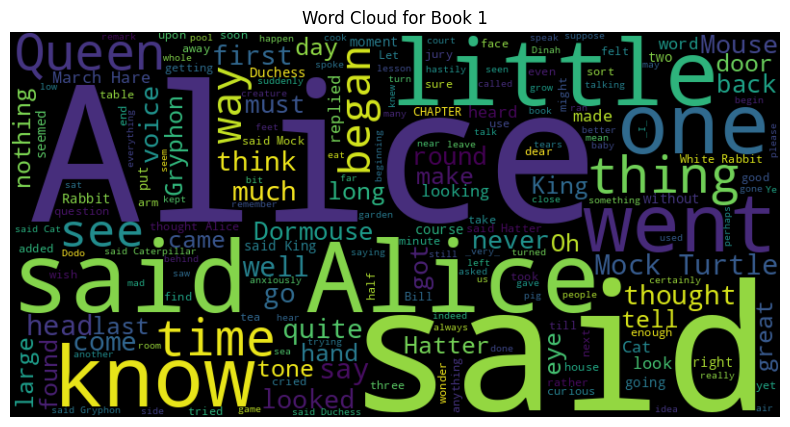

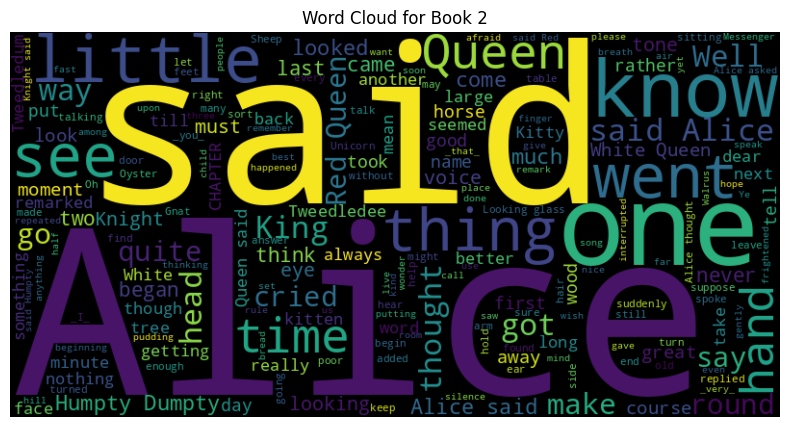

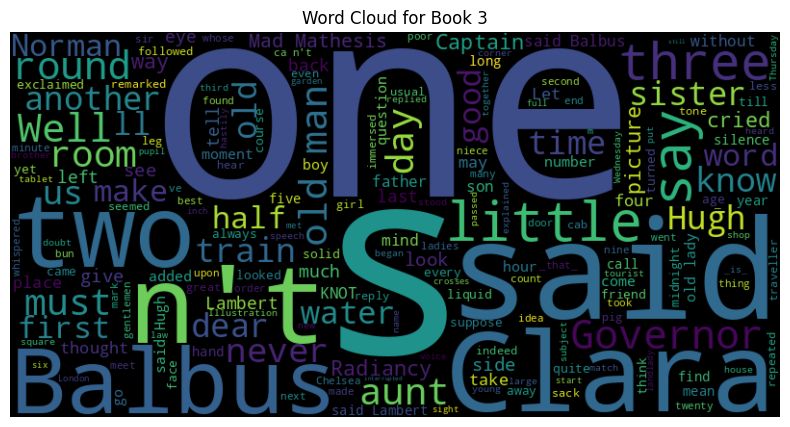

In [70]:
# Create a word cloud for each book.
for i, book in enumerate(cleaned_books):
  wordcloud = WordCloud(width=800, height=400).generate(" ".join(book))

  # Plot the word cloud.
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud for Book {i+1}")
  plt.show()


In [115]:
vectorizer = CountVectorizer()
vectorizer.fit(new_corpus)
bag_of_words = vectorizer.transform(new_corpus)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print("Most frequent words in all the books:")
for word, freq in words_freq[:5]:
  print(f"{word}: {freq}")

Most frequent words in all the books:
the: 4044
and: 2150
to: 1755
it: 1450
of: 1322


In [116]:
all_books = []
for book in cleaned_books:
  all_books.extend(book)

In [120]:
vectorizer = CountVectorizer()
vectorizer.fit(all_books)
bag_of_words = vectorizer.transform(all_books)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print("Most frequent words in all the books:")
for word, freq in words_freq[:5]:
  print(f"{word}: {freq}")

Most frequent words in all the books:
said: 1057
alice: 867
one: 344
little: 271
queen: 265


In [118]:
vectorizer = CountVectorizer()
for i, text in enumerate(cleaned_books):
  vectorizer.fit(text)
  bag_of_words = vectorizer.transform(text)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  print(f"Most frequent word in book #{i+1}:")
  for word, freq in words_freq[:5]:
    print(f"{word}: {freq}")
  print("\n")

Most frequent word in book #1:
said: 460
alice: 399
little: 127
one: 101
know: 87


Most frequent word in book #2:
said: 473
alice: 468
queen: 189
one: 152
know: 125


Most frequent word in book #3:
said: 124
one: 91
old: 58
balbus: 53
clara: 53




In [121]:
print(bag_of_words)
# The document number is the first number in each row.
# The index is the second number in each row.
# The third number is the number of times the word was found.

  (0, 4423)	1
  (1, 3609)	1
  (2, 2231)	1
  (3, 1610)	1
  (4, 398)	1
  (6, 360)	1
  (7, 5212)	1
  (12, 2447)	1
  (14, 398)	1
  (16, 360)	1
  (17, 5212)	1
  (18, 2763)	1
  (19, 919)	1
  (20, 3018)	1
  (21, 2045)	1
  (22, 1619)	1
  (24, 1184)	1
  (25, 970)	1
  (27, 2367)	1
  (27, 3716)	1
  (28, 970)	1
  (29, 2444)	1
  (31, 3529)	1
  (32, 4623)	1
  (33, 970)	1
  :	:
  (52939, 2824)	1
  (52940, 4930)	1
  (52941, 3118)	1
  (52945, 2269)	1
  (52946, 1811)	1
  (52949, 3113)	1
  (52950, 2409)	1
  (52953, 2114)	1
  (52954, 4975)	1
  (52955, 2598)	1
  (52956, 5223)	1
  (52960, 1811)	1
  (52963, 1051)	1
  (52964, 1612)	1
  (52966, 709)	1
  (52969, 5124)	1
  (52972, 3755)	1
  (52973, 3826)	1
  (52974, 2704)	1
  (52975, 5221)	1
  (52976, 2095)	1
  (52977, 1051)	1
  (52979, 1834)	1
  (52979, 5124)	1
  (52981, 473)	1


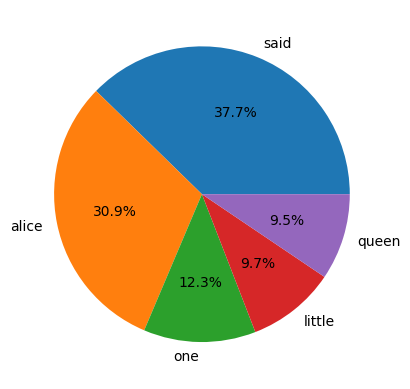

In [104]:
# Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.

word, freq = zip(*words_freq[:5])
plt.pie(freq, labels=word, autopct='%1.1f%%')
plt.show()

In [122]:
vectorizer = TfidfVectorizer(min_df=1, max_df=2)
vectorizer.fit(new_corpus)
bag_of_words = vectorizer.transform(new_corpus)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
print("Most frequent words in all the books:")
for word, freq in words_freq[:5]:
  print(f"{word}: {freq}")

Most frequent words in all the books:
alice: 1.6766805051593916
queen: 0.4992020075603205
balbus: 0.41171259632228674
clara: 0.41171259632228674
king: 0.2523221875828329


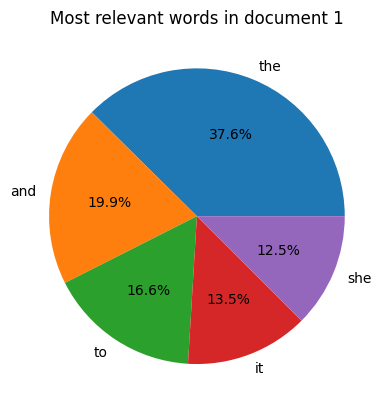

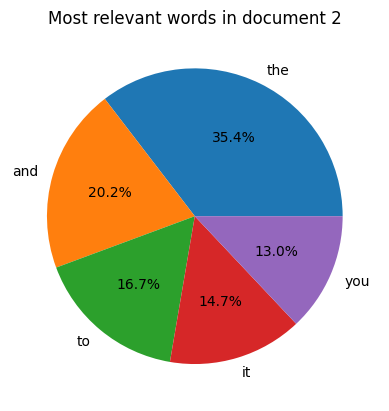

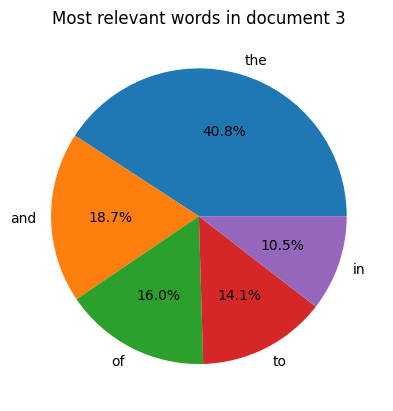

In [128]:

# Create again the pie plots with the new 5 most relevant words from each document.

for i, text in enumerate(new_corpus):
  vectorizer = TfidfVectorizer(min_df=1, max_df=2)
  vectorizer.fit([text])
  bag_of_words = vectorizer.transform([text])
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

  word, freq = zip(*words_freq[:5])
  plt.pie(freq, labels=word, autopct='%1.1f%%')
  plt.title(f"Most relevant words in document {i+1}")
  plt.show()
  print("\n")


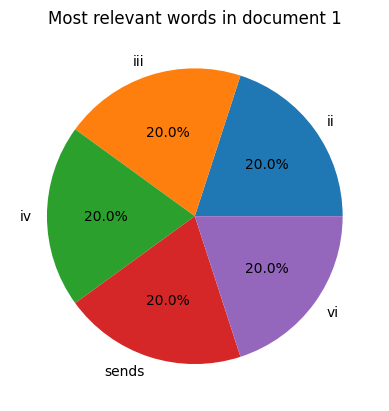

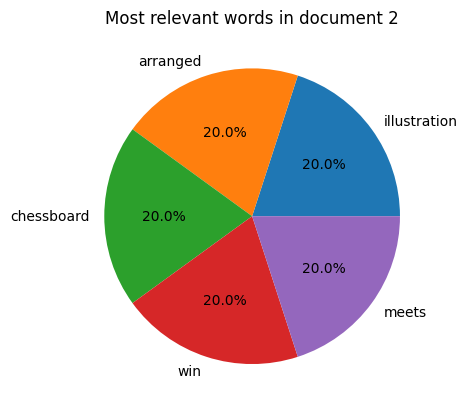

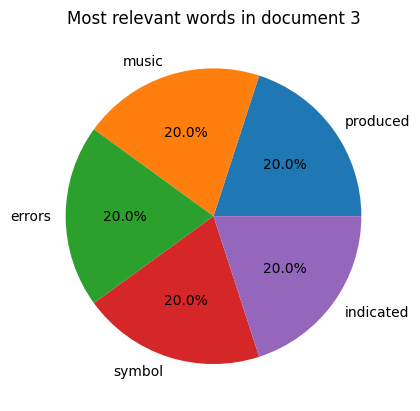

In [127]:
# Create again the pie plots with the new 5 most relevant words from each document.

for i, text in enumerate(cleaned_books):
  vectorizer = TfidfVectorizer(min_df=1, max_df=2)
  vectorizer.fit(text)
  bag_of_words = vectorizer.transform(text)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

  word, freq = zip(*words_freq[:5])
  plt.pie(freq, labels=word, autopct='%1.1f%%')
  plt.title(f"Most relevant words in document {i+1}")
  plt.show()
  print("\n")